In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math as m
import timeit

In [7]:
def generate_random_sequence(seed, n):
    rand_sequence = [seed]
    for i in range(1, n+1):
        rand_sequence.append(7**5 * rand_sequence[i-1] % (2**31 - 1))
    return rand_sequence[1:]

In [10]:
rand_sequence = generate_random_sequence(7, 10000)
U = list(map(lambda x: (x+0.5)/(2**31 - 1), rand_sequence))
mean_uniform = sum(U)/len(U)
mean_uniform

0.5015877556912541

In [13]:
np.random.seed(7)
U_builtin = np.random.uniform(size = 10000)
mean = sum(U_builtin)/len(U_builtin)

def case_mapping(n):
    if n<0.3:
        n = -1
    elif 0.3 < n <= (0.3 + 0.35):
        n = 0
    elif (0.3 + 0.35) < n  <=  (0.3 + 0.35 + 0.2):
        n = 1
    else: 
        n = 2 
    return n

dist_x = list(map(case_mapping,U))

In [18]:
rand_sequence = generate_random_sequence(seed = 7, n = 44000)
U44 = list(map(lambda x: (x + 0.5) /  (2**31 - 1), rand_sequence))

p = .64
bernoulli = list(map(lambda x: 1 if x<p else 0, U44))
split_points = list(range(0, 44000, 44))

sublist = [bernoulli[i:i+44] for i in split_points]
binomial = list(map(sum, sublist))
# binomial

In [20]:
lmda = 1.5
exponential = list(map(lambda y: -1/lmda * m.log(y), U))

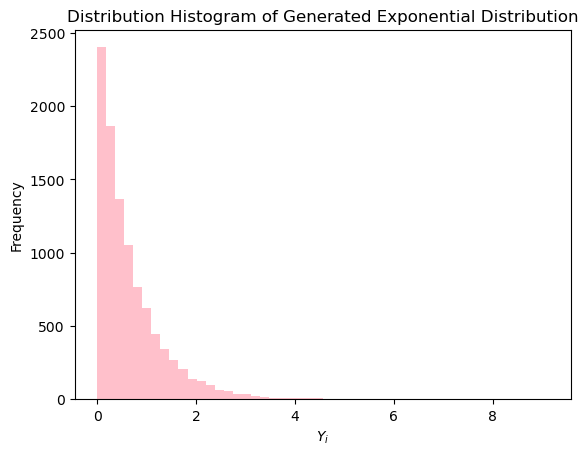

In [21]:
plt.hist(exponential, bins = 50, color = 'pink')
plt.title('Distribution Histogram of Generated Exponential Distribution')
plt.xlabel('$Y_i$')
plt.ylabel('Frequency')
plt.show()

Box Muller Method

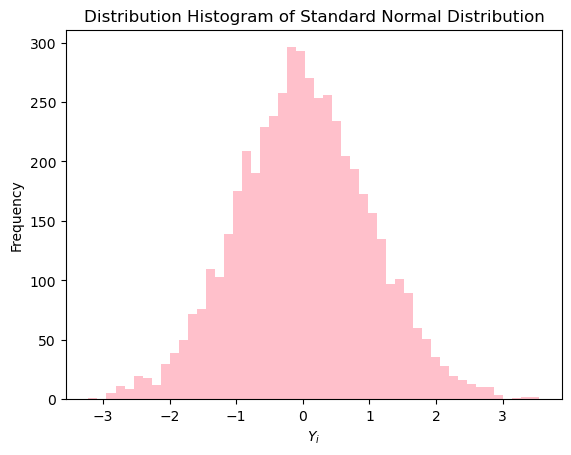

In [24]:
rand1 = generate_random_sequence(n = 5000, seed = 101)
rand2 = generate_random_sequence(n = 5000, seed = 123)

U1 = list(map(lambda x1: (x1 + 0.5) / (2**31 - 1), rand1))
U2 = list(map(lambda x2: (x2 + 0.5) / (2**31 - 1), rand2))
Z1 = list(map(lambda u1, u2: m.sqrt(-2*m.log(u1)) * m.sin(2*m.pi*u2), U1, U2))

plt.hist(Z1, bins = 50, color = 'pink')
plt.title('Distribution Histogram of Standard Normal Distribution')
plt.xlabel('$Y_i$')
plt.ylabel('Frequency')
plt.show()

Polar-Marsaglia method

In [25]:
def generate_normal(n, u1, u2):
    Z2 = []
    i = 0
    while n>0:
        v1 = 2*u1[i] - 1
        v2 = 2*u2[i] - 1
        W = v1**2 + v2**2
        i +=1

        if W<= 1:
            A = m.sqrt(-2*m.log(W)/W)
            Z2.append(v2 * A)
            n -= 1
        else:
            pass
    return Z2

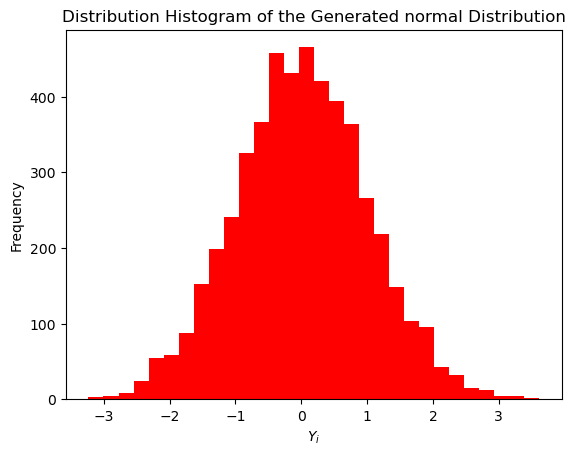

In [26]:
U1 = list(map(lambda x1: (x1 + 0.5) / (2**31 - 1), generate_random_sequence(n = 6500, seed = 101)))
U2 = list(map(lambda x1: (x1 + 0.5) / (2**31 - 1), generate_random_sequence(n = 6500, seed = 123)))

Z2 = generate_normal(5000, U1, U2)

plt.hist(Z2, color ='red', bins = 30)
plt.title('Distribution Histogram of the Generated normal Distribution')
plt.xlabel('$Y_i$')
plt.ylabel('Frequency')
plt.show()

Comparing Effeciencies

In [31]:
start_time = timeit.default_timer()
rand1 = generate_random_sequence(n = 5000, seed = 101)
rand2 = generate_random_sequence(n = 5000, seed = 123)

U1 = list(map(lambda x1: (x1 + 0.5) / (2**31 - 1), rand1))
U2 = list(map(lambda x2: (x2 + 0.5) / (2**31 - 1), rand2))

Z1 = list(map(lambda u1, u2: m.sqrt(-2*m.log(u1)) * m.sin(2*m.pi*u2), U1, U2))

box_muller_time = timeit.default_timer() - start_time
box_muller_time

0.005660400000124355

In [30]:
start_time = timeit.default_timer()
rand1 = generate_random_sequence(n = 6500, seed = 101)
rand2 = generate_random_sequence(n = 6500, seed = 123)

U1 = list(map(lambda x1: (x1 + 0.5) / (2**31 - 1), rand1))
U2 = list(map(lambda x2: (x2 + 0.5) / (2**31 - 1), rand2))

Z2 = generate_normal(5000, U1, U2)

polar_marsaglia_time = timeit.default_timer() - start_time
polar_marsaglia_time

0.0076461000007839175